In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
import setuptools.dist
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

c:\Users\Bruger\anaconda3\envs\python_3_10_16\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load dataset from UCI repository
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(dataset_url, delimiter=';')

# Display basic dataset info
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Data preprocessing (Assuming target variable is 'quality')
X = df.drop(columns=['quality'])
y = df['quality']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train an XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Train a simple neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regression output layer
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=1, validation_data=(X_test_scaled, y_test))

c:\Users\Bruger\anaconda3\envs\python_3_10_16\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 26.2879 - val_loss: 4.0038
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1327 - val_loss: 2.2302
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1138 - val_loss: 1.6648
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6387 - val_loss: 1.3511
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3137 - val_loss: 1.1345
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1551 - val_loss: 0.9461
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0303 - val_loss: 0.8200
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7986 - val_loss: 0.7201
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6790 - val_loss: 0.6447
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6651 - val_loss: 0.6149
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5908 - val_loss: 0.5393
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5413 - val_l

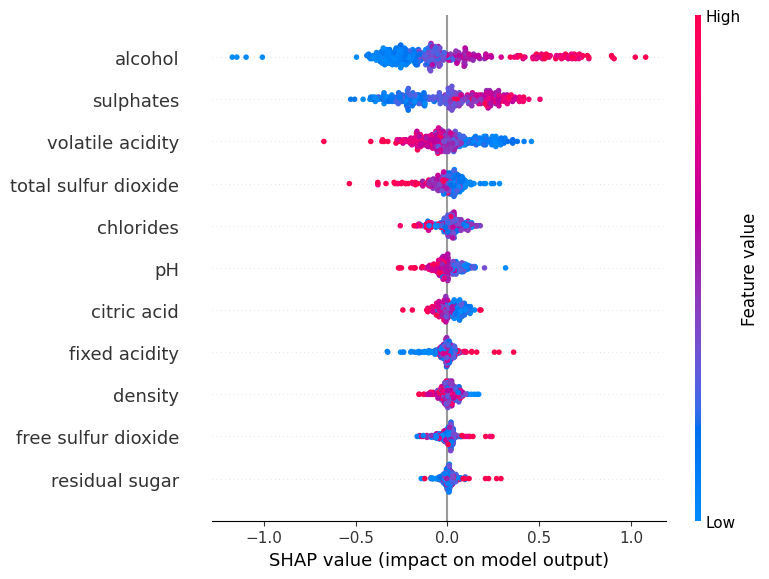

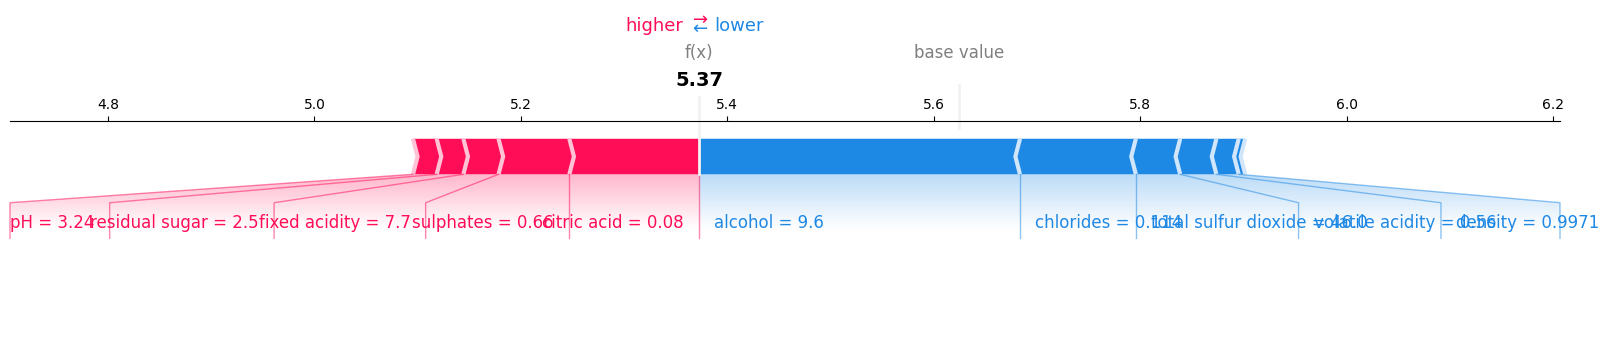

In [6]:
# SHAP explanation for XGBoost
explainer_xgb = shap.Explainer(xgb_model, X_train)
shap_values_xgb = explainer_xgb(X_test)

# SHAP summary plot (Global explanation)
shap.summary_plot(shap_values_xgb, X_test)

# SHAP force plot for local explanation (first instance)
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0].values, X_test.iloc[0,:], matplotlib=True)


PermutationExplainer explainer: 321it [00:56,  5.69it/s]                         
C:\Users\Bruger\AppData\Local\Temp\ipykernel_8060\3796298938.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_nn, X_test_scaled)


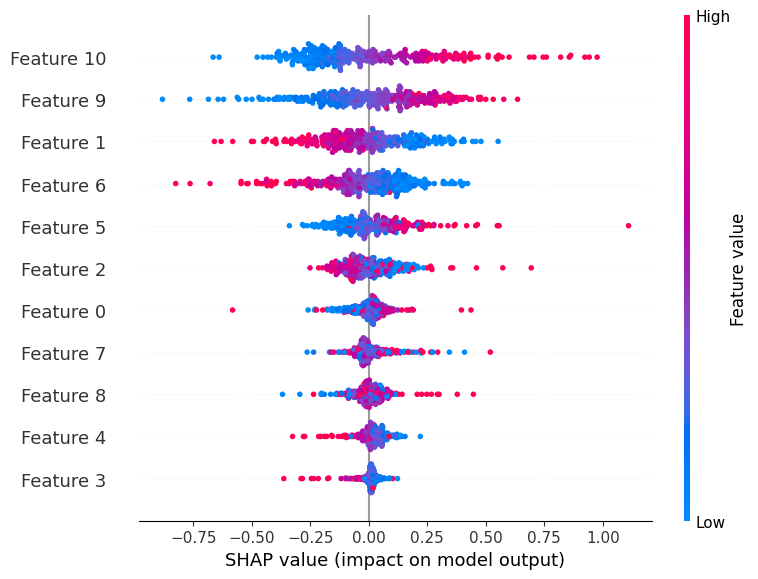

AttributeError: 'PermutationExplainer' object has no attribute 'expected_value'

In [7]:
# SHAP explanation for Neural Network
explainer_nn = shap.Explainer(model, X_train_scaled)
shap_values_nn = explainer_nn(X_test_scaled)

# SHAP summary plot for Neural Network
shap.summary_plot(shap_values_nn, X_test_scaled)

# SHAP force plot for first instance (Neural Network)
shap.waterfall_plot(explainer_nn.expected_value, shap_values_nn[0].values, X_test_scaled[0])
#shap.force_plot(explainer_nn.expected_value, shap_values_nn[0].values, X_test_scaled[0], matplotlib=True)

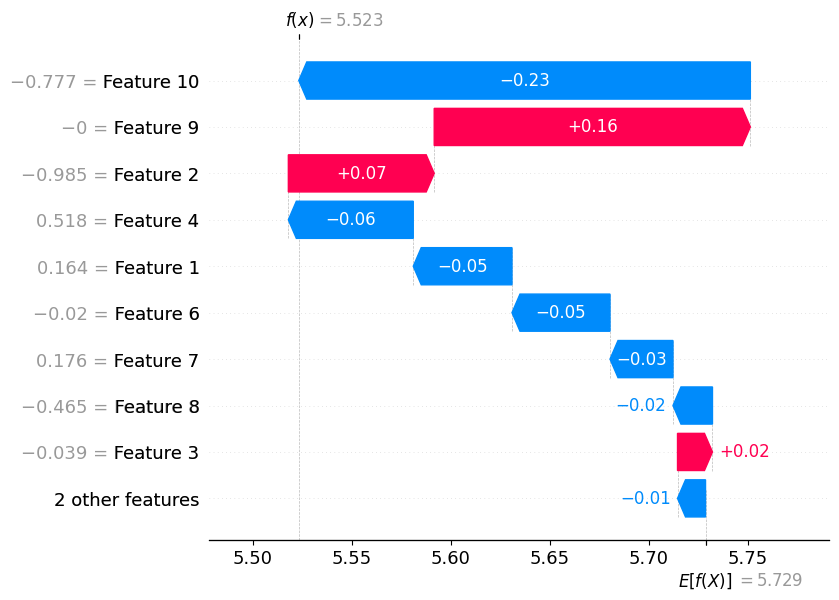

In [11]:

shap.waterfall_plot(shap_values_nn[0])